In [1]:
import pandas as pd
import numpy as np
import numpy
from matplotlib import pyplot as plt
import tensorflow.keras as keras
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("GNW.CSV")

Epoch 1/100
39/39 [==============================] - 13s 185ms/step - loss: 0.0275 - val_loss: 1.9918e-04
Epoch 2/100
39/39 [==============================] - 6s 162ms/step - loss: 0.0015 - val_loss: 1.7025e-04
Epoch 3/100
39/39 [==============================] - 6s 159ms/step - loss: 0.0012 - val_loss: 1.6034e-04
Epoch 4/100
39/39 [==============================] - 6s 155ms/step - loss: 0.0011 - val_loss: 1.6383e-04
Epoch 5/100
39/39 [==============================] - 6s 154ms/step - loss: 0.0011 - val_loss: 2.3497e-04
Epoch 6/100
39/39 [==============================] - 6s 167ms/step - loss: 0.0010 - val_loss: 2.1051e-04
Epoch 7/100
39/39 [==============================] - 9s 234ms/step - loss: 9.7194e-04 - val_loss: 1.7653e-04
Epoch 8/100
39/39 [==============================] - 8s 201ms/step - loss: 9.3953e-04 - val_loss: 1.1805e-04
Epoch 9/100
39/39 [==============================] - 8s 195ms/step - loss: 9.8205e-04 - val_loss: 1.3460e-04
Epoch 10/100
39/39 [======================

Epoch 76/100
39/39 [==============================] - 7s 189ms/step - loss: 1.9723e-04 - val_loss: 3.6144e-05
Epoch 77/100
39/39 [==============================] - 7s 189ms/step - loss: 2.5627e-04 - val_loss: 2.8876e-05
Epoch 78/100
39/39 [==============================] - 7s 189ms/step - loss: 1.9273e-04 - val_loss: 2.8986e-05
Epoch 79/100
39/39 [==============================] - 8s 212ms/step - loss: 1.8446e-04 - val_loss: 3.7996e-05
Epoch 80/100
39/39 [==============================] - 8s 198ms/step - loss: 1.8558e-04 - val_loss: 3.5704e-05
Epoch 81/100
39/39 [==============================] - 7s 189ms/step - loss: 1.8125e-04 - val_loss: 2.5956e-05
Epoch 82/100
39/39 [==============================] - 7s 189ms/step - loss: 2.0162e-04 - val_loss: 3.0623e-05
Epoch 83/100
39/39 [==============================] - 7s 192ms/step - loss: 2.0037e-04 - val_loss: 2.8803e-05
Epoch 84/100
39/39 [==============================] - 7s 190ms/step - loss: 2.0174e-04 - val_loss: 2.5238e-05
Epoch 85/1

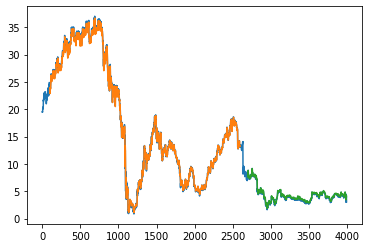

In [2]:
df
df1=df.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
model=keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [3]:
model.layers

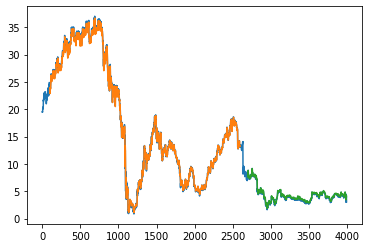

In [4]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

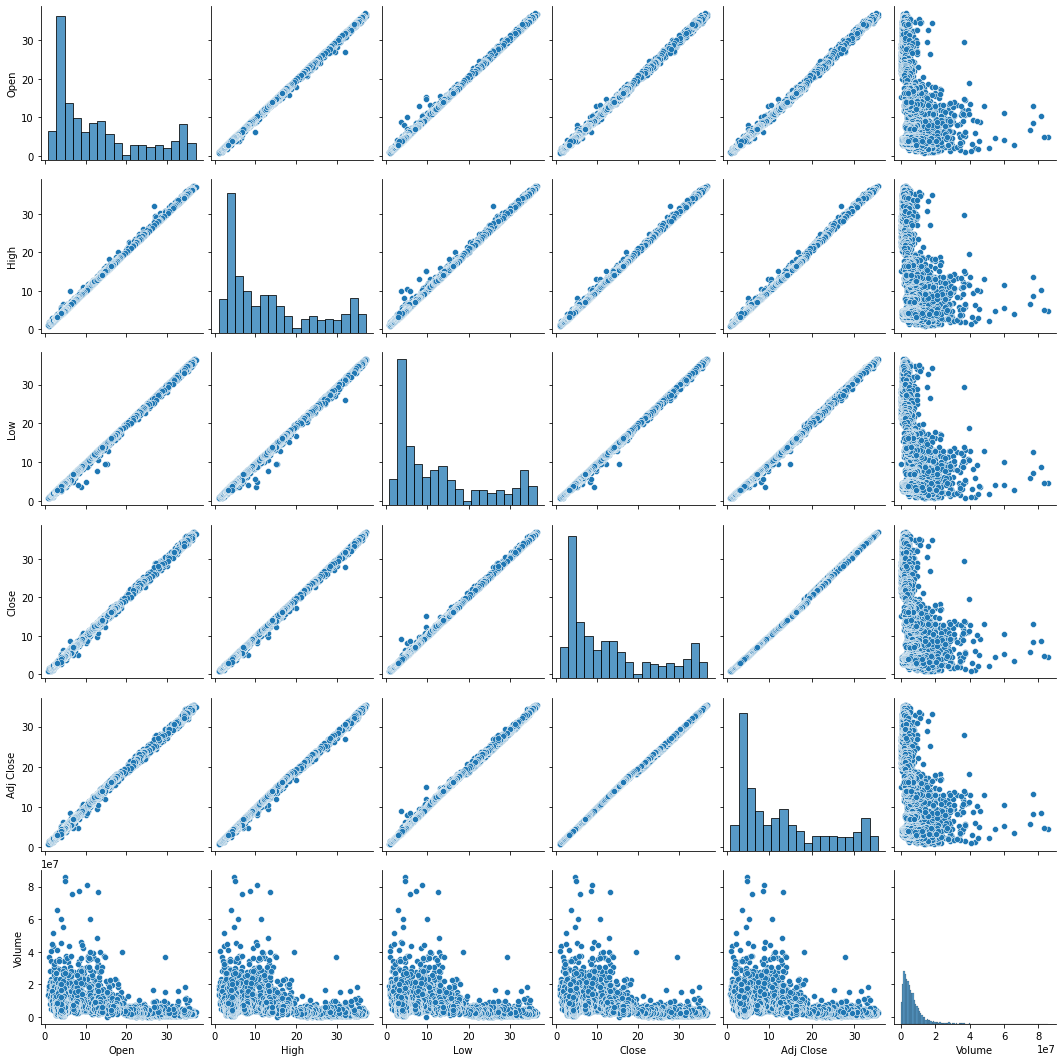

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [7]:
df1

array([[0.51603982],
       [0.51603982],
       [0.51603982],
       ...,
       [0.08877213],
       [0.06858407],
       [0.06111726]])

In [8]:
df1=df.reset_index()['Close']

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
training_size=int(len(df1)*0.65)

In [11]:
testing_size=len(df1)-training_size

In [12]:
trd=df1[0:training_size,:]

In [13]:
ted=df1[training_size:,:]

In [14]:
len(df1)

3991

In [15]:
def makeDS(dset,t_step=1):
    datax,datay=[],[]
    for i in range (len(dset)-t_step-1):
        datax.append(dset[i:(i+t_step),0])
        datay.append(dset[i+t_step,0])
    return np.array(datax),np.array(datay)


In [16]:
time_step=100
xtr,ytr=makeDS(trd,time_step)
xte,yte=makeDS(ted,time_step)

In [17]:
xtr.shape

(2493, 100)

In [18]:
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],1)
xte=xte.reshape(xte.shape[0],xte.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(xtr,ytr,validation_data=(xte,yte),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 13s 217ms/step - loss: 0.0363 - val_loss: 4.6592e-04
Epoch 2/100
39/39 [==============================] - 8s 200ms/step - loss: 0.0013 - val_loss: 1.5785e-04
Epoch 3/100
39/39 [==============================] - 8s 195ms/step - loss: 0.0011 - val_loss: 1.2918e-04
Epoch 4/100
39/39 [==============================] - 8s 208ms/step - loss: 0.0010 - val_loss: 1.6870e-04
Epoch 5/100
39/39 [==============================] - 10s 260ms/step - loss: 9.9288e-04 - val_loss: 1.5244e-04
Epoch 6/100
39/39 [==============================] - 10s 265ms/step - loss: 9.5707e-04 - val_loss: 2.6207e-04
Epoch 7/100
39/39 [==============================] - 9s 234ms/step - loss: 9.4340e-04 - val_loss: 1.9250e-04
Epoch 8/100
39/39 [==============================] - 10s 261ms/step - loss: 8.9724e-04 - val_loss: 1.5134e-04
Epoch 9/100
39/39 [==============================] - 9s 220ms/step - loss: 8.5713e-04 - val_loss: 1.5523e-04
Epoch 10/100
39/39 [===========

39/39 [==============================] - 7s 176ms/step - loss: 2.4087e-04 - val_loss: 4.5208e-05
Epoch 76/100
39/39 [==============================] - 7s 175ms/step - loss: 2.3769e-04 - val_loss: 3.7539e-05
Epoch 77/100
39/39 [==============================] - 7s 174ms/step - loss: 2.3905e-04 - val_loss: 4.6047e-05
Epoch 78/100
39/39 [==============================] - 7s 175ms/step - loss: 2.7931e-04 - val_loss: 4.5127e-05
Epoch 79/100
39/39 [==============================] - 7s 174ms/step - loss: 2.7051e-04 - val_loss: 6.0658e-05
Epoch 80/100
39/39 [==============================] - 7s 175ms/step - loss: 2.4022e-04 - val_loss: 3.4714e-05
Epoch 81/100
39/39 [==============================] - 7s 176ms/step - loss: 2.3675e-04 - val_loss: 3.3975e-05
Epoch 82/100
39/39 [==============================] - 7s 175ms/step - loss: 2.2190e-04 - val_loss: 3.2945e-05
Epoch 83/100
39/39 [==============================] - 7s 176ms/step - loss: 2.4246e-04 - val_loss: 3.3723e-05
Epoch 84/100
39/39 [===

In [23]:
train_predict=model.predict(xtr)
test_predict=model.predict(xte)

In [24]:
test_predict

array([[0.18283342],
       [0.18541333],
       [0.18864106],
       ...,
       [0.08210727],
       [0.0844372 ],
       [0.0858704 ]], dtype=float32)

In [25]:
from matplotlib import pyplot as plt

In [26]:
max(df1)

array([1.])

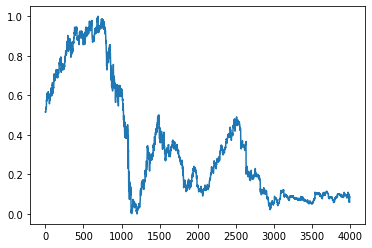

In [27]:
plt.plot(df1)

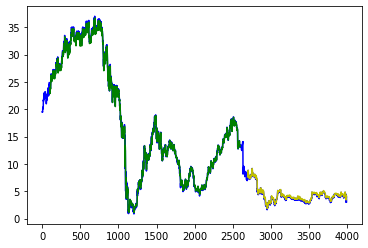

In [28]:

plt.plot(scaler.inverse_transform(df1),c='b')
plt.plot(testPredictPlot,c='y')
plt.plot(trainPredictPlot,c='g')
plt.show()

In [29]:
scaler.inverse_transform(df)

array([[2.64592130e+07, 6.86072028e+02, 7.06321609e+02, ...,
        7.05960000e+02, 6.60760828e+02, 1.44356144e+09],
       [2.64592492e+07, 7.05960000e+02, 7.07044825e+02, ...,
        7.05960000e+02, 6.60760828e+02, 2.94045889e+08],
       [2.64592853e+07, 7.05960000e+02, 7.06321609e+02, ...,
        7.05960000e+02, 6.60760828e+02, 3.89736097e+08],
       ...,
       [2.66685071e+07, 1.41140804e+02, 1.49457605e+02, ...,
        1.47288007e+02, 1.47288007e+02, 1.57950497e+08],
       [2.66685433e+07, 1.44395201e+02, 1.51265595e+02, ...,
        1.20891198e+02, 1.20891198e+02, 7.34044385e+08],
       [2.66685794e+07, 1.05704003e+02, 1.18360000e+02, ...,
        1.11127998e+02, 1.11127998e+02, 3.16580801e+08]])